## Fotoğraftaki El Yazısı Rakamları Otomatik Tanıma Ve Anlamlandırma

Projemizde kullanacağımız MNIST elyazısı rakamları veritabanında  784 feature sütunu mevcut (784 dimensions), ve training set olarak 60,000 örnek veri ve  10,000 örneklik test seti bulunmaktadır.

In [25]:
import pandas as pd
from dask.array import reshape
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mist=fetch_openml('mnist_784')

In [26]:
mist.data.shape

(70000, 784)

In [27]:
def showimage(dframe,index):
    some_digit=dframe.to_numpy()[index]
    some_digit_image=some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis('off')
    plt.show()

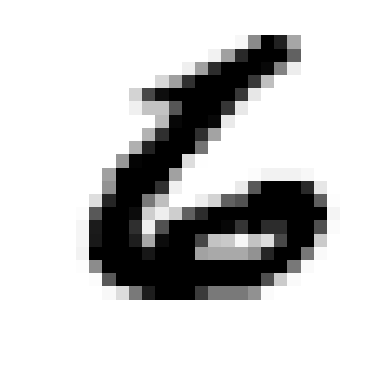

In [28]:
showimage(mist.data,69999)
# veri setinden belirli bir indeks numarasına sahip görüntüyü alıp ekranda gösteriyor.

In [29]:
train_img , test_img , train_lbl , test_lbl = train_test_split(mist.data,mist.target,test_size=1/7.0,random_state=0)

In [30]:
type(train_img)

pandas.core.frame.DataFrame

## Verileri Scale etmemiz gerekiyor :
Çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor bu nedenle mutlaka scaling işleminden geçiriyoruz. Bu amaçla da StandardScaler kullanıyoruz.

In [31]:
test_img_copy=test_img.copy()

In [32]:
scaler = StandardScaler()
#fit işlemini sadece traning sete yapmammız yeterli.
scaler.fit(train_img)
# ama transform işlemini ikisine de yapmalıyız
train_img= scaler.transform(train_img)
test_img= scaler.transform(test_img)

In [33]:
pca=PCA(.95)
# %95 korumayı hedefledik
pca.fit(train_img)
print(pca.n_components_)
# %95 i koruyarak 784 boyuttan kaç boyuta düşebilmişiz ?

327


In [34]:
train_img= pca.transform(train_img)
test_img= pca.transform(test_img)
# şimdi transform işlemiyle hem train hem test verilerimizi 784 ten 327 ye düşürelim

# 2.Aşama Logistic Regression modelini PCA işleminden geçirilmiş veri seti üstünde uygulayacağız.
#### Kısaca Logistic Regression :
Logistic Regression (Lojistik Regresyon), sınıflandırma problemleri için kullanılan istatistiksel bir makine öğrenmesi algoritmasıdır. Adında "regression" (regresyon) geçmesine rağmen, aslında sınıflandırma için kullanılır..

Bir girdinin belirli bir sınıfa ait olup olmadığını olasılık üzerinden tahmin etmektir.

✔ Basit ve hızlıdır

✔ İkili (binary) sınıflandırma için idealdir

✔ Çok sınıflı (multiclass) versiyonu da vardır

✖ Daha karmaşık verilerde doğrusal ayrılabilen sınıflar gerektirir

Kısacası Logistic Regression, sınıflandırma problemlerinde olasılık tahmini yapan güçlü bir yöntemdir.

In [35]:
# lbfgs daha hızlı çalışan bir solver  olduğu için onu seçiyoruz
# solver ile optimizasyon algoritması seçmekteyiz.
#Maksimum iterasyon sayısını 10.000 olarak ayarlayarak modelin daha iyi yakınsamasını (convergence) sağlar.
logisticRgr=LogisticRegression(solver="lbfgs",max_iter=10000)

Varsayılan olarak lbfgs en güvenli seçimdir (özellikle çok sınıflı problemler için).

Büyük veri setlerinde sag veya saga daha hızlı olabilir.

Küçük veri kümelerinde liblinear daha verimli olabilir.

Newton optimizasyonu gerektiren durumlarda newton-cg seçilebilir.

In [36]:
logisticRgr.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [39]:
# model eğitildi şimdi tanıma işlemini deneyelim
logisticRgr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

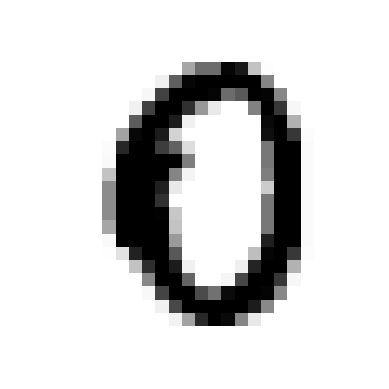

In [40]:
showimage(test_img_copy,0)

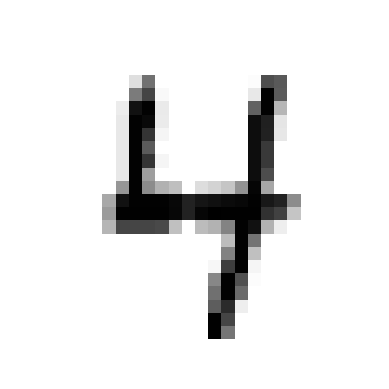

In [41]:
showimage(test_img_copy,1)

In [42]:
logisticRgr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

In [43]:
# doğruluk oranı:
logisticRgr.score(test_img,test_lbl)

0.9188